# Explanation of data

## 1-total_bill:

Description: The total amount of the bill (in dollars) for the meal, including the cost of food and drinks.
Data Type: Float
Example: 16.99
## 2-tip:

Description: The amount of the tip (in dollars) given by the customer to the server.
Data Type: Float
Example: 1.01
## 3-sex:

Description: The gender of the person who paid for the meal.
Data Type: Categorical (string)
Possible Values: 'Male', 'Female'
Example: 'Female'
## 4-smoker:

Description: Indicates whether there were smokers in the party.
Data Type: Categorical (string)
Possible Values: 'Yes', 'No'
Example: 'No'
## 5-day:

Description: The day of the week when the meal was served.
Data Type: Categorical (string)
Possible Values: 'Thur' (Thursday), 'Fri' (Friday), 'Sat' (Saturday), 'Sun' (Sunday)
Example: 'Sun'
## 6-time:

Description: The time of day when the meal was served.
Data Type: Categorical (string)
Possible Values: 'Lunch', 'Dinner'
Example: 'Dinner'
## 7-size:

Description: The number of people in the party.
Data Type: Integer
Example: 2

# Libraries

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Load the dataset

In [372]:
data = pd.read_csv('tips.csv')
df = data.copy()

## Display the first few rows

In [373]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Question 1: What is the average total bill amount?

In [374]:
avg_total_bill = np.average(df['total_bill'])
print("Average total bill: ", avg_total_bill)

Average total bill:  19.78594262295082


## Question 2: How many records are in the dataset?


In [375]:
print(f'records are in the dataset : {df.shape[0]}')
print(f'records are in the dataset : {len(df)}')
print(f'shape of the dataset : {df.shape}')


records are in the dataset : 244
records are in the dataset : 244
shape of the dataset : (244, 7)


## Question 3: What is the total amount of tips given by male customers?


In [376]:
total_tips_male = df[df['sex'] == 'Male']
total_tips_male = total_tips_male['tip'].sum()
print(f"The total amount of tips given by male customers is: ${total_tips_male:.2f}")

The total amount of tips given by male customers is: $485.07


## Question 4: What is the maximum tip given?


In [377]:
max_tip = np.max(df['tip'])
print('the maximum tip given is: ', max_tip)

the maximum tip given is:  10.0


## Question 5: What are the unique days on which the tips were recorded?


In [378]:
unique_days = df['day'].unique()
unique_days

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [379]:
un_days_with_tips = df[df['tip'] > 0].drop_duplicates(subset=['day'])
un_days_with_tips 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
19,20.65,3.35,Male,No,Sat,Dinner,3
77,27.20,4.00,Male,No,Thur,Lunch,4
90,28.97,3.00,Male,Yes,Fri,Dinner,2


In [380]:
unique_days_with_tips = df[df['tip'] > 5]['day'].unique()
print("The unique days on which tips were recorded are:", unique_days_with_tips)

The unique days on which tips were recorded are: ['Sat' 'Sun' 'Thur']


## Question 6: What is the average tip amount given by female customers?


In [381]:
female_avg_tip = np.average(df[df['sex']=='Female']['tip'])
print(f'the average tip amount given by female customers : {female_avg_tip}')

the average tip amount given by female customers : 2.8334482758620685


## Question 7: How many customers are non-smokers?


In [382]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [383]:
non_smokers =len( df[df['smoker'] == 'No'] )
print(f"Number of non-smokers: {non_smokers}")

Number of non-smokers: 151


## Question 8: What is the average total bill for dinners?


In [384]:
avg_dinners = df[df['time'] == 'Dinner']['total_bill']
avg_dinners = np.average(avg_dinners)
print(f'the average total bill for dinners {avg_dinners}')

the average total bill for dinners 20.79715909090909


## Question 9: What is the smallest size of a group recorded?


In [385]:
smallest_group_size = df['size'].min()
print(f"The smallest size of a group recorded is: {smallest_group_size}")

The smallest size of a group recorded is: 1


## Question 10: What is the standard deviation of the total bill amounts?


In [386]:
std_total_bill = np.std(df['total_bill'])
st_total_bill = df['total_bill'].std()
print(f"Standard Deviation of total_bill: {std_total_bill:.2f} ")
print(f"Standard Deviation of total_bill: {st_total_bill:.2f}")

Standard Deviation of total_bill: 8.88 
Standard Deviation of total_bill: 8.90


## Question 11: How many male smokers are there compared to female smokers?


In [387]:
# male_smokers = (df[df['sex'] == 'Male']) & (df[df['smoker']== 'Yes'].shape[0])
# female_smokers = (df[df['sex'] == 'Female']) & (df[df['smoker']== 'Yes'].shape[0])
# print(f'male smokers : {male_smokers}')
# print(f'female smokers : {female_smokers}') 
# print('male smokers  compared to female smokers :', (male_smokers / female_smokers)*100)
# print('male smokers  compared to female smokers :', (female_smokers / male_smokers)*100)


male_smokers_count = df[(df['sex'] == 'Male') & (df['smoker'] == 'Yes')].shape[0]
female_smokers_count = df[(df['sex'] == 'Female') & (df['smoker'] == 'Yes')].shape[0]

print(f'Male smokers: {male_smokers_count}')
print(f'Female smokers: {female_smokers_count}')

if female_smokers_count != 0:
    print(f'Male smokers compared to female smokers: {(male_smokers_count / female_smokers_count) * 100:.2f}%')
else:
    print("No female smokers in the dataset.")

if male_smokers_count != 0:
    print(f'Female smokers compared to male smokers: {(female_smokers_count / male_smokers_count) * 100:.2f}%')
else:
    print("No male smokers in the dataset.")


Male smokers: 60
Female smokers: 33
Male smokers compared to female smokers: 181.82%
Female smokers compared to male smokers: 55.00%


## Question 12: How much more do male customers tip on average than female customers?

In [388]:
female_tip_avg = df[df['sex'] == 'Female']['tip'].max()
print(female_tip_avg)
male_tip_avg = df[df['sex'] == 'Male']['tip'] > female_tip_avg
print(f'male customers tip on average than female customers : ', np.average(male_tip_avg)*100)

6.5
male customers tip on average than female customers :  3.1847133757961785


## Question 13: What is the median tip amount given by customers on Thursdays?

In [389]:
median_tip =df['tip'][df['day'] == 'Thur']
print(np.median(median_tip))
print(median_tip.median())

2.3049999999999997
2.3049999999999997


## Question 14: What is the total tip amount given by customers on Friday?


In [390]:
median_tip =df['tip'][df['day'] == 'Fri'].sum()
print(f"the total tip amount given by customers on Friday : {median_tip}")


the total tip amount given by customers on Friday : 51.959999999999994


## Question 15: What is the average tip amount for non-smokers during dinner time?

In [391]:
non_smokers_dinner = df[(df['smoker'] == 'No') & (df['time'] == 'Dinner')]
average_tip_non_smokers_dinner = non_smokers_dinner['tip'].mean()
print(f"The average tip amount for non-smokers during dinner time is: ${average_tip_non_smokers_dinner:.2f}")


The average tip amount for non-smokers during dinner time is: $3.13


## Question 16: How much does the total bill vary between smokers and non-smokers?

In [392]:
smokers_total_bill_std = df[df['smoker'] == 'Yes']['total_bill'].std()
non_smokers_total_bill_std = df[df['smoker'] == 'No']['total_bill'].std()

print(f"The standard deviation of the total bill for smokers: ${smokers_total_bill_std:.2f}")
print(f"The standard deviation of the total bill for non-smokers: ${non_smokers_total_bill_std:.2f}")


The standard deviation of the total bill for smokers: $9.83
The standard deviation of the total bill for non-smokers: $8.26


## Question 17: What is the most common day for customers to visit the restaurant?

In [393]:
most_common_day = df['day'].mode()[0]
print(f"The most common day for customers to visit the restaurant is: {most_common_day}")


The most common day for customers to visit the restaurant is: Sat


## Question 18: What is the range of tip amounts for female customers?


In [394]:
female_tips_range = df[df['sex'] == 'Female']['tip'].max() - df[df['sex'] == 'Female']['tip'].min()
print(f"The range of tip amounts for female customers is: ${female_tips_range:.2f}")


The range of tip amounts for female customers is: $5.50


## Question 19: Calculate the total bill for parties of 5 or more people (size).


In [395]:
total_bill_for_large_parties = df[df['size'] >= 5]['total_bill'].sum()
print(f"The total bill for parties of 5 or more people is: ${total_bill_for_large_parties:.2f}")


The total bill for parties of 5 or more people is: $289.66


## Question 20: What is the highest total bill recorded during lunch?


In [396]:
highest_lunch_bill = df[df['time'] == 'Lunch']['total_bill'].max()
print(f"The highest total bill recorded during lunch is: ${highest_lunch_bill:.2f}")


The highest total bill recorded during lunch is: $43.11


## Question 21: How many customers visited the restaurant on weekends (Saturday and Sunday) and ordered a total bill of more than $20?

In [397]:
weekend_customers_over_20 = df[(df['day'].isin(['Sat', 'Sun'])) & (df['total_bill'] > 20)].shape[0]
print(f"The number of customers who visited the restaurant on weekends and ordered a total bill of more than $20 is: {weekend_customers_over_20}")


The number of customers who visited the restaurant on weekends and ordered a total bill of more than $20 is: 75




```
# Hint isin ()

```



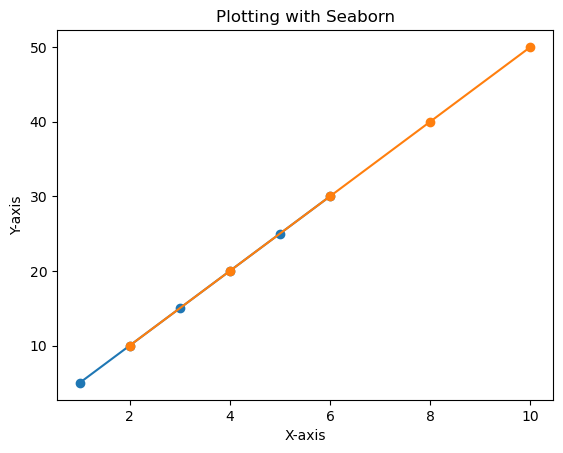

In [398]:
import seaborn as sns
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6]
y = [5 , 10 , 15, 20, 25, 30]
plt.plot(x , y, marker='o')
plt.title('Plotting with Seaborn')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

x1 = [2 , 4 , 6 , 8 , 10]
y1 = [10 , 20 , 30 , 40 , 50]
plt.plot(x1 , y1, marker='o')
plt.title('Plotting with Seaborn')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()



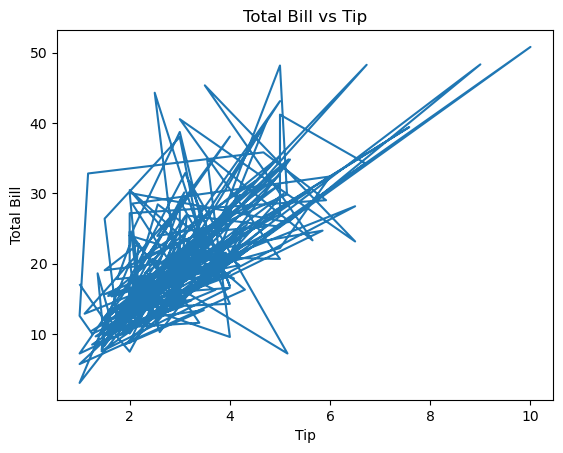

In [399]:
plt.plot(df['tip'] , df['total_bill'])
plt.title( 'Total Bill vs Tip' )
plt.xlabel( 'Tip' )
plt.ylabel( 'Total Bill' )
plt.show()


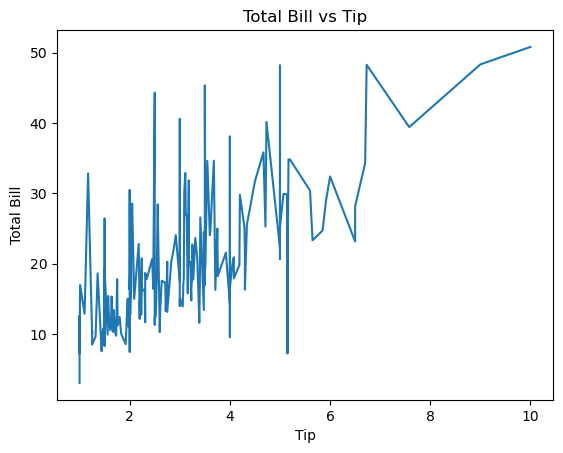

In [400]:
df_sorted = df.sort_values(by='tip')
plt.plot(df_sorted['tip'] , df_sorted['total_bill'])
plt.title( 'Total Bill vs Tip' )
plt.xlabel( 'Tip' )
plt.ylabel( 'Total Bill' )
plt.show()

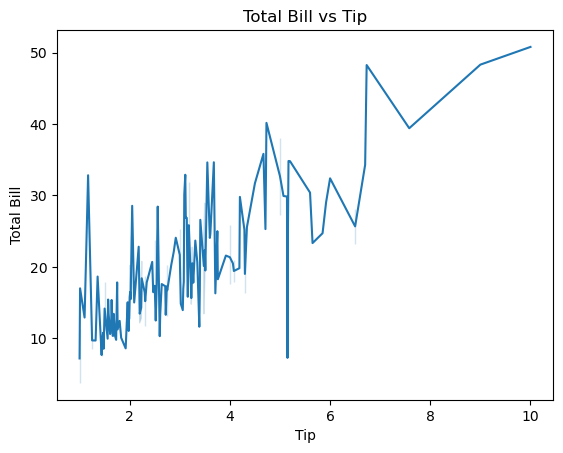

In [401]:
sns.lineplot(x = df['tip'] , y = df['total_bill']) # plot the data , data in seaborn sorted automatic other wise use sort_values() function in matlotlib
plt.title( 'Total Bill vs Tip' )
plt.xlabel( 'Tip' )
plt.ylabel( 'Total Bill' )
plt.show()


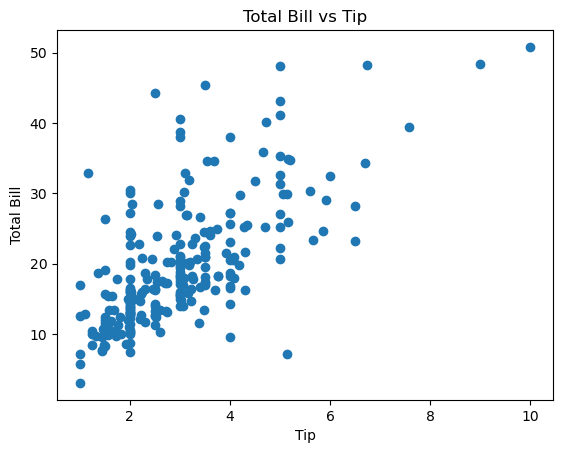

In [402]:
plt.scatter(df['tip'] , df['total_bill'])
plt.title('Total Bill vs Tip')
plt.xlabel('Tip')
plt.ylabel('Total Bill')
plt.show()

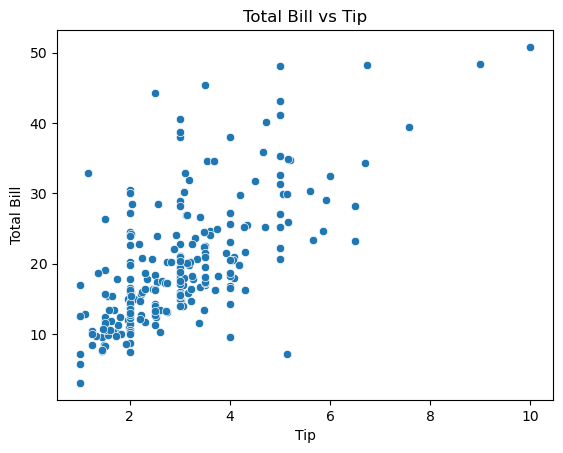

In [403]:
sns.scatterplot(x =df['tip'] , y = df['total_bill'])
plt.title('Total Bill vs Tip')
plt.xlabel('Tip')
plt.ylabel('Total Bill')
plt.show()

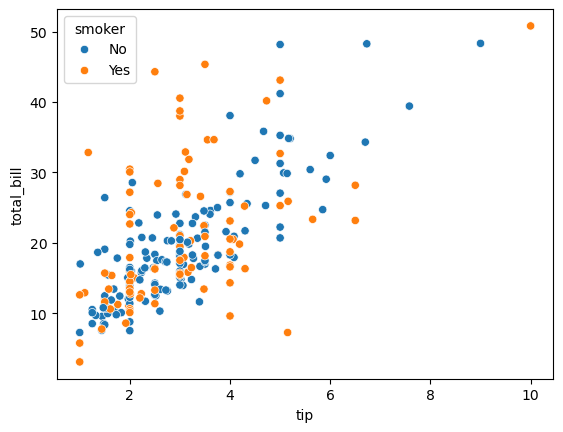

In [404]:
sns.scatterplot(x =df['tip'] , y = df['total_bill'] , hue=df["smoker"])
plt.show() # hue is used to color the points based on the smoker column

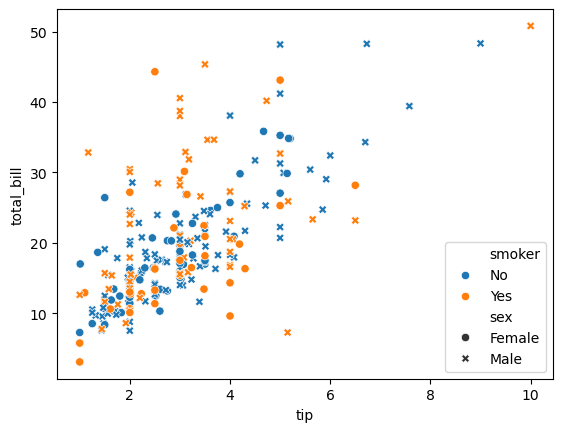

In [405]:
sns.scatterplot(x =df['tip'] , y = df['total_bill'] , hue=df["smoker"] , style=df['sex'])
plt.show() # hue is used to color the points based on the smoker column
# style is used to style the points based on the sex column

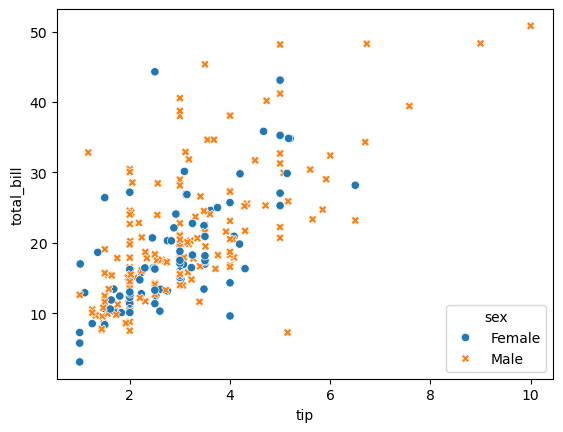

In [406]:
sns.scatterplot(x =df['tip'] , y = df['total_bill'] , hue=df["sex"] , style=df['sex'])
plt.show() # hue is used to color the points based on the smoker column
# style is used to style the points based on the sex column

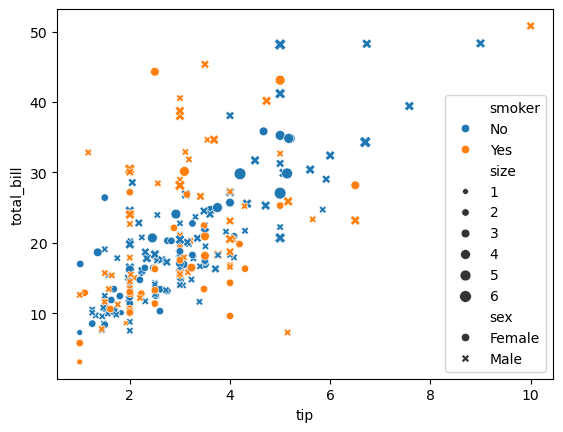

In [407]:
sns.scatterplot(x =df['tip'] , y = df['total_bill'] , hue=df["smoker"] , style=df['sex'] , size=df['size'])
plt.show() # hue is used to color the points based on the smoker column
# style is used to style the points based on the sex column

In [408]:
# sns.regplot()

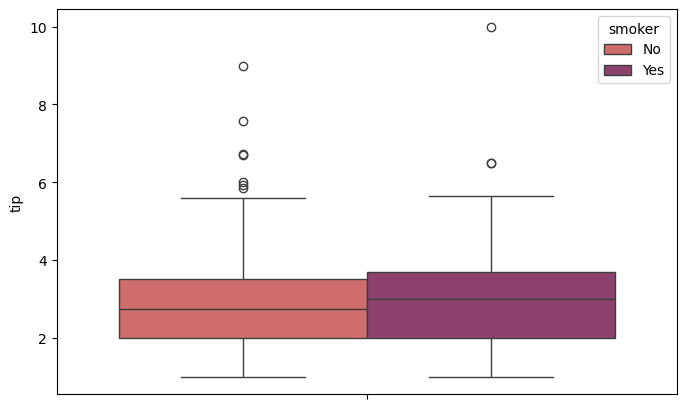

In [409]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['tip']  , hue=df['smoker'] , palette='flare')
plt.show()

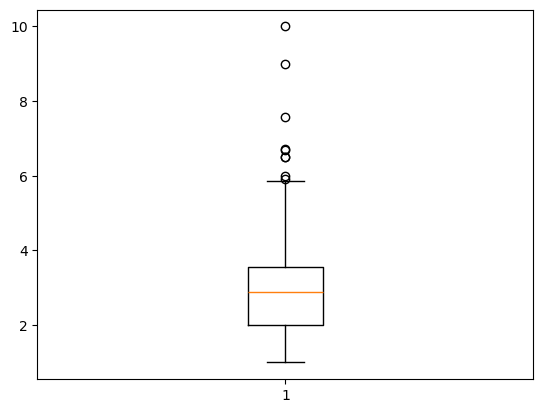

In [410]:
plt.boxplot(df['tip'])
plt.show()

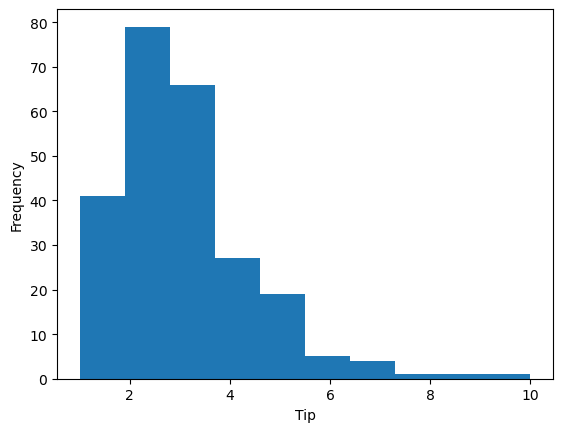

In [411]:
plt.hist(df['tip'])
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

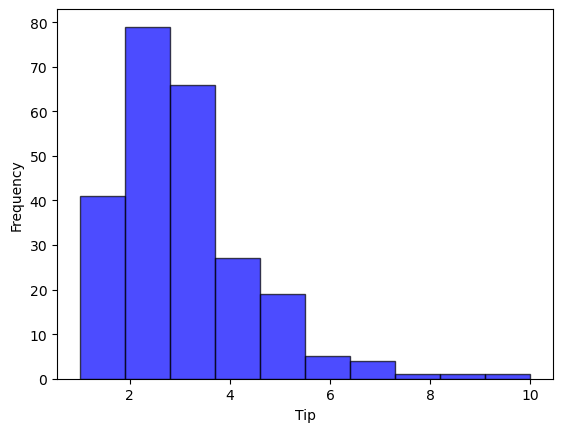

In [412]:
plt.hist(df['tip'] , bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()
# bins =10 means the data will be divided into 10 equal parts. alpha=0.7 means
# the transparency of the histogram will be 70%. color='blue' means the color of th
# e histogram will be blue. edgecolor='black' means the color of the edges of th
# alpha =0.7 means the transparency of the histogram will be 70%. color='blue' m

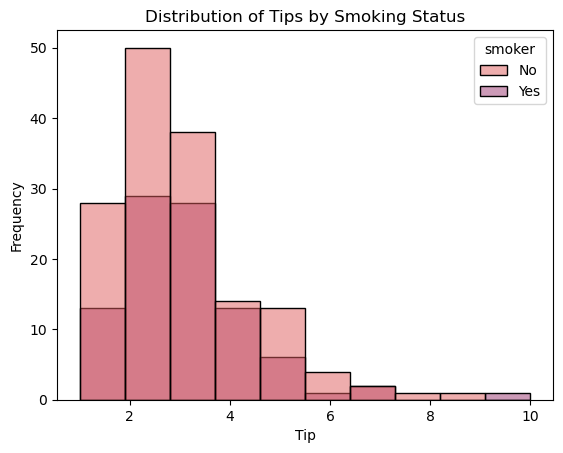

In [413]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='tip', bins=10, hue='smoker', palette='flare')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.title('Distribution of Tips by Smoking Status')
plt.show()


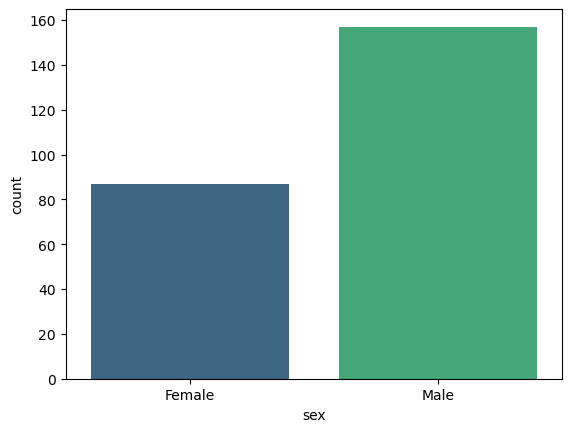

In [414]:
sns.countplot(x = df['sex'] , hue = df['sex'] , palette = 'viridis' )
plt.show()

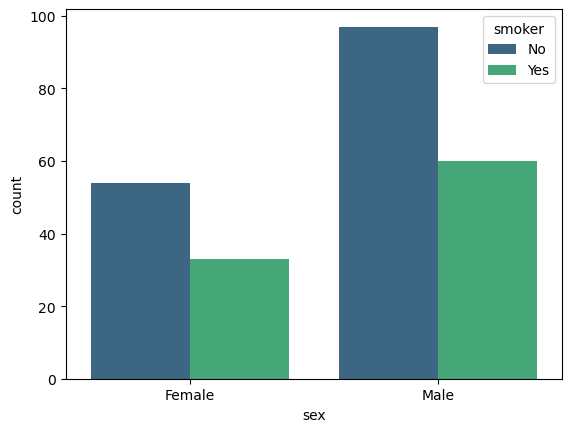

In [415]:
sns.countplot(x = df['sex'] , hue = df['smoker'] , palette = 'viridis' )
plt.show()

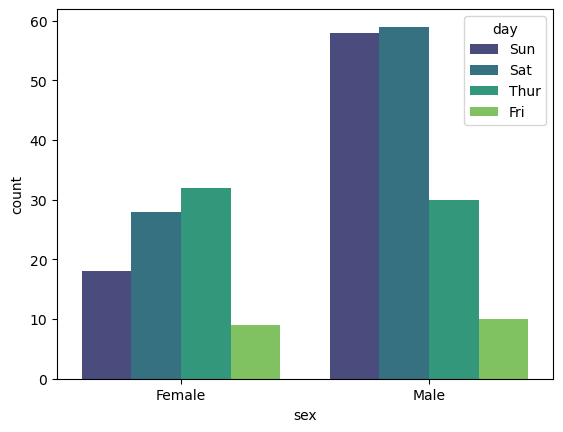

In [416]:
sns.countplot(x = df['sex'] , hue = df['day'] , palette = 'viridis' )
plt.show()

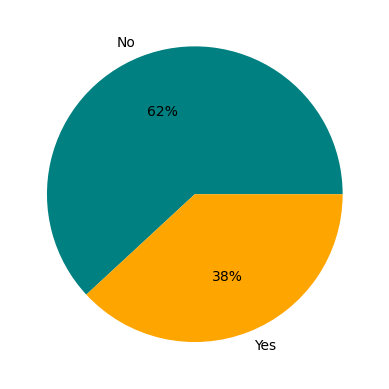

In [417]:
plt.pie(df['smoker'].value_counts() ,autopct= '%1.0f%%' , labels = df['smoker'].value_counts().index ,colors= ['teal' , 'orange'])\
# autoct : autopct = '%1.0f%%' , 1.0f : 1
# labels : labels = df['smoker'].value_counts().index , index : index of th
plt.show()


In [418]:
categories = ['A' , 'B' , 'A' , 'B' , 'C', 'C']
values = [5,7,3,8,4,6]
# Create a DataFrame
dat= pd.DataFrame({'category': categories, 'value': values})
dat

,category,value
0,A,5
1,B,7
2,A,3
3,B,8
4,C,4
5,C,6


In [419]:

dat.groupby('category').agg({'value': 'mean'})


,value
category,
A,4.0
B,7.5
C,5.0


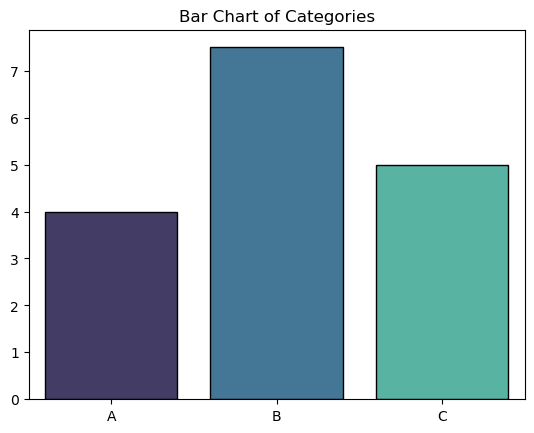

In [420]:
sns.barplot(x = categories , y = values , color = 'skyblue' , edgecolor = 'black'  , ci=None  , estimator='mean' , palette='mako')
plt.title('Bar Chart of Categories')
# barplot function is used to create a bar chart to display the estimator  ( mean is defult, sum , median )ratings of the categories
# ci is used to display the confidence interval of the mean 
# ci mean is used to display the confidence interval of the mean
# the equation is ci = (mean - (1.96 * (std / sqrt(n))))
# n is the number of data points in the category
# std is the standard deviation of the category
# z or 1.96 is the z-score for 95% confidence interval
plt.show()

<Axes: xlabel='sex', ylabel='total_bill'>

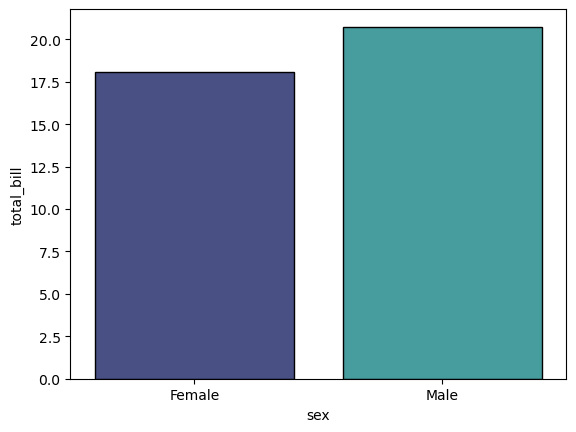

In [421]:
sns.barplot(x = df['sex'] , y = df['total_bill'], color = 'skyblue' , edgecolor = 'black'  , ci=None  , estimator='mean' , palette='mako')


<Axes: xlabel='day', ylabel='total_bill'>

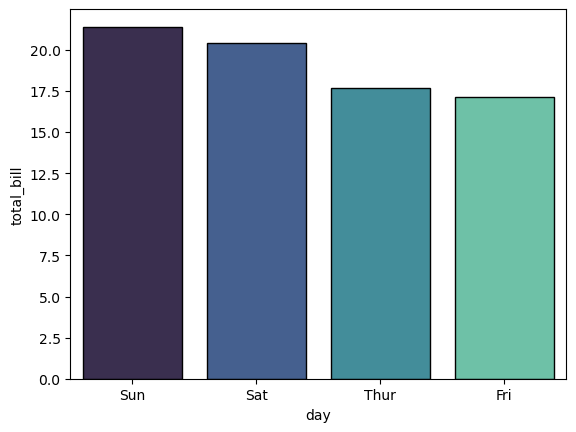

In [422]:
sns.barplot(x = df['day'] , y = df['total_bill'], color = 'skyblue' , edgecolor = 'black'  , ci=None  , estimator='mean' , palette='mako')


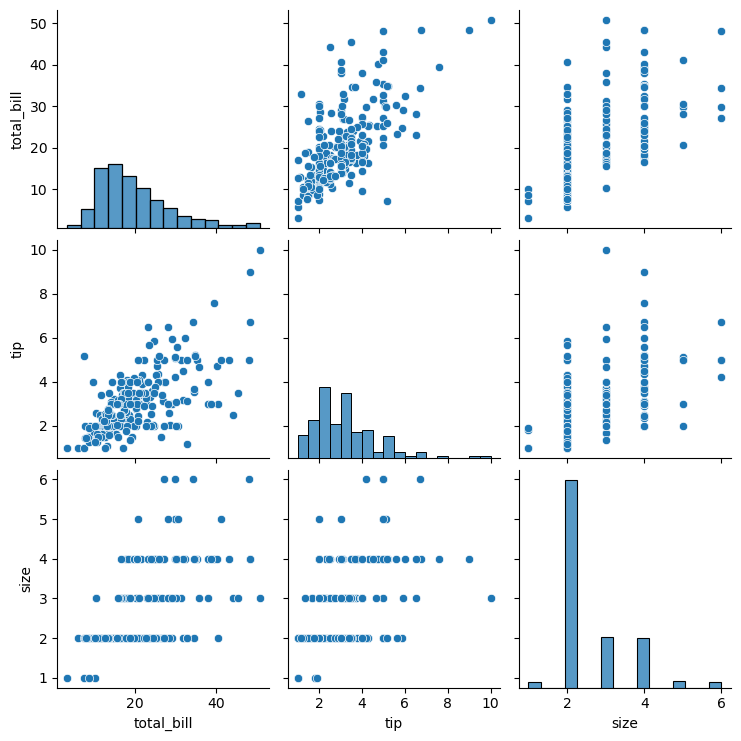

In [423]:
sns.pairplot(df)

<Axes: >

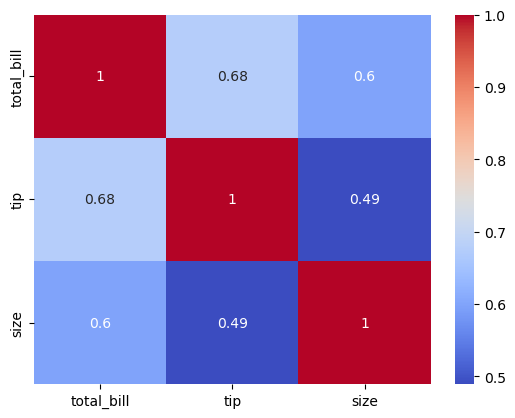

In [429]:
num  = df.select_dtypes(include='number')
sns.heatmap(num.corr() , annot=True , cmap='coolwarm' )

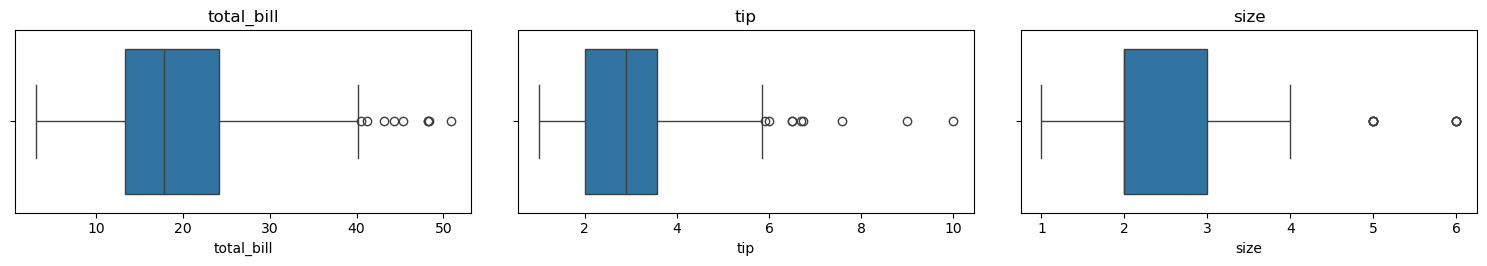

In [426]:
plt.figure(figsize=(20,5))
for index ,col in enumerate(num.columns , start=1):
    plt.subplot(2 ,4 ,index )
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout(h_pad=3.0 , w_pad= 3)
plt.show()

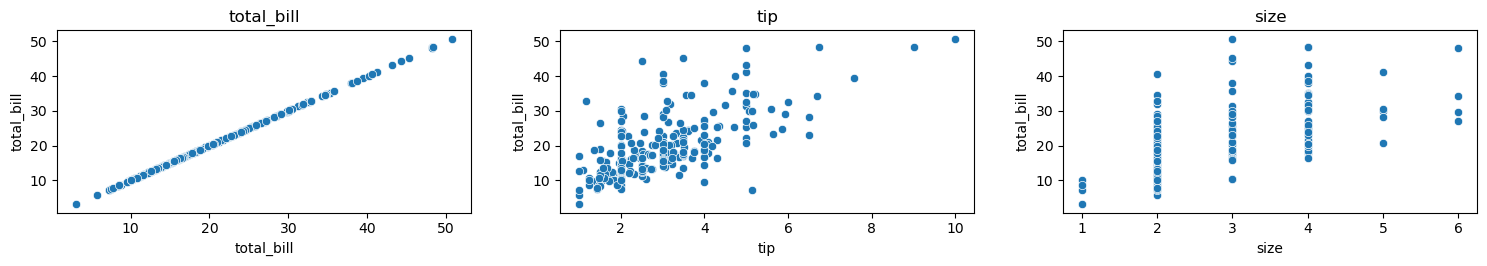

In [432]:
plt.figure(figsize=(20,5))
for index ,col in enumerate(num.columns , start=1):
    plt.subplot(2 ,4 ,index )
    sns.scatterplot(x=df[col] , y=num['total_bill'] , data=df)
    plt.title(col)

plt.tight_layout(h_pad=3.0 , w_pad= 3)
plt.show()

In [433]:
import plotly.express as px


In [ ]:
px.line(x=[1,2,3] , y=[1,2,3] )

In [438]:
fig = px.histogram(df['tip'])
fig.show()

In [439]:
px.pie(df , names='day')